In [1]:
import matplotlib.pyplot as plt
plt.figure(dpi=120)
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso, Ridge, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_bikeshare, load_concrete, load_credit, load_energy, load_mushroom, load_occupancy, load_spam
from yellowbrick.features import JointPlotVisualizer, Manifold, ParallelCoordinates, PCA, RadViz, Rank1D, Rank2D
from yellowbrick.regressor import ResidualsPlot, prediction_error

<Figure size 768x576 with 0 Axes>

In [2]:
# Load data
X, y = load_spam()

# Transformation
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

1. Krzywa ROC

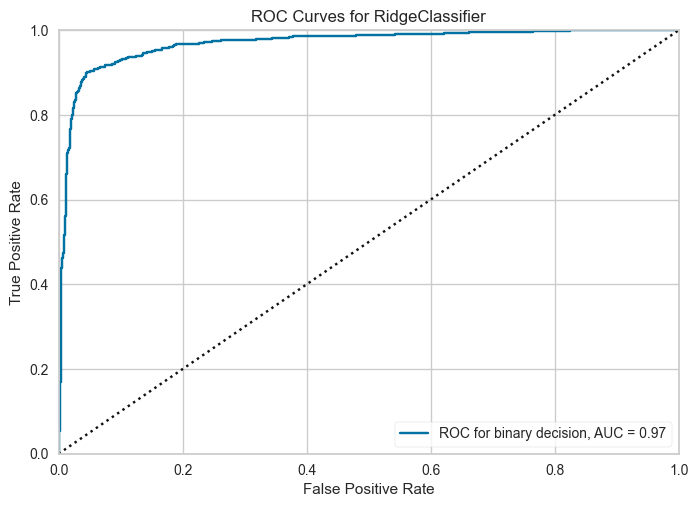

<Axes: title={'center': 'ROC Curves for RidgeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [3]:
# Build a model and draw the ROC
model = RidgeClassifier()
visualizer = ROCAUC(model, classes=[0, 1], binary=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  # Evaluation
visualizer.show()

2. PCA

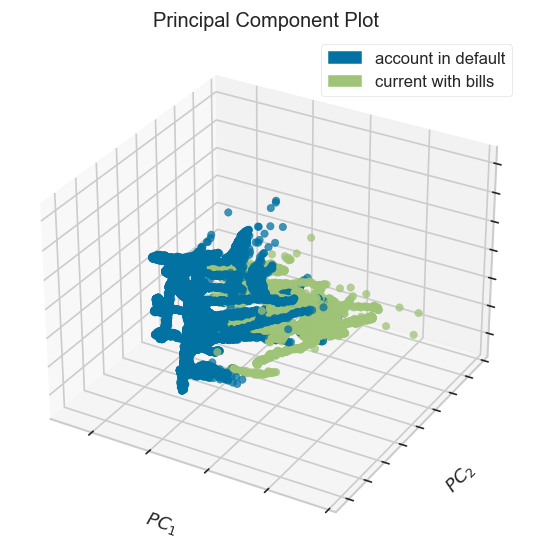

<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [4]:
plt.figure(dpi=120)
X, y = load_occupancy()
classes = ['account in default', 'current with bills']

visualizer = PCA(scale=True, projection=3, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show()

3. Wykres Q-Q dla modelu regresji Ridge

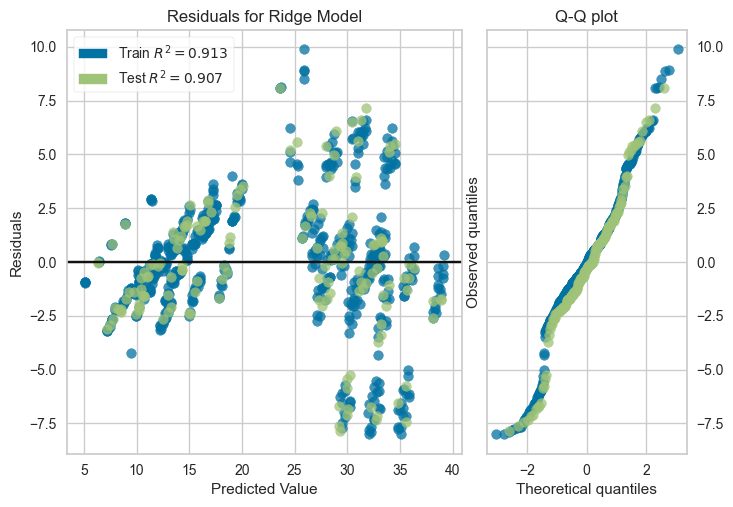

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [5]:
X, y = load_energy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge()
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

4. Wykres regresji Lasso

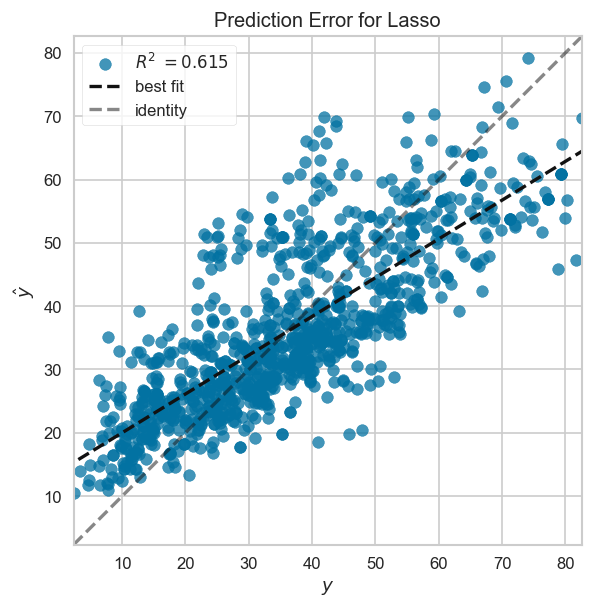

In [6]:
plt.figure(dpi=120)
X, y = load_concrete()
visualizer = prediction_error(Lasso(), X, y) # Only one line of code!

5. Analiza cech (zmiennych)

5.1. Jednowymiarowy

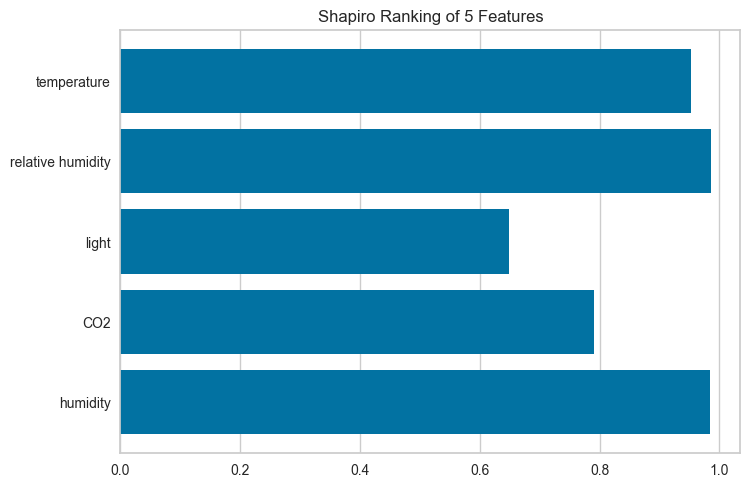

<Axes: title={'center': 'Shapiro Ranking of 5 Features'}>

In [7]:
X, y = load_occupancy()

visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

5.2. Dwuwymiarowy

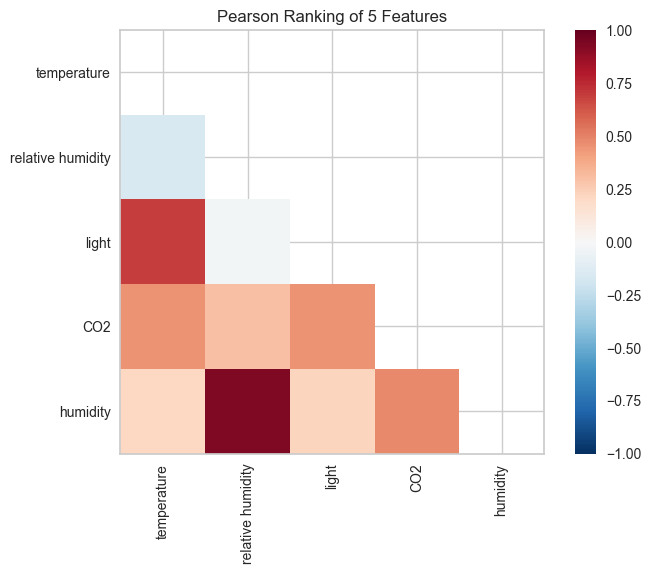

<Axes: title={'center': 'Pearson Ranking of 5 Features'}>

In [8]:
X, y = load_occupancy()

visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

5.3. Współrzędne równoległe

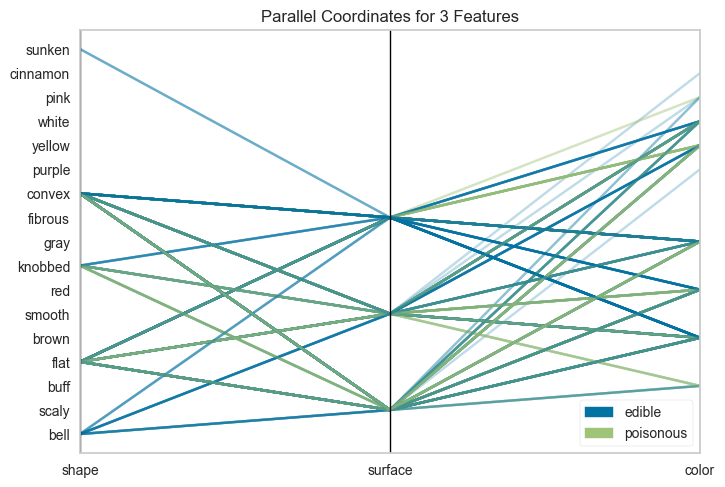

<Axes: title={'center': 'Parallel Coordinates for 3 Features'}>

In [9]:
X, y = load_mushroom()

# Specify the features of interest and the classes of the target
features = list(X.columns)
classes = ["edible", "poisonous"]

visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.05, shuffle=True
)

visualizer.fit_transform(X, y)

visualizer.show()

5.4. RadViz

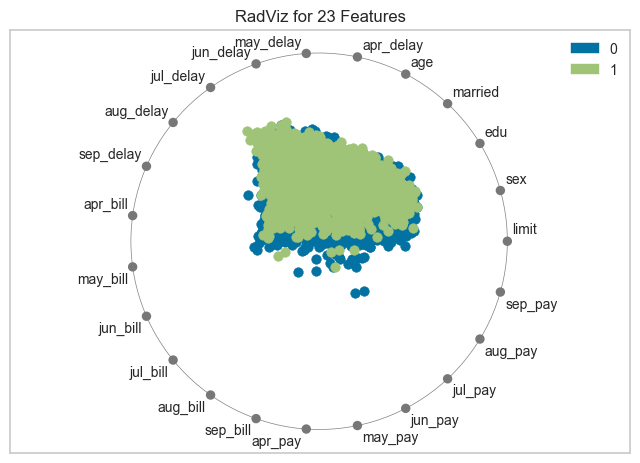

<Axes: title={'center': 'RadViz for 23 Features'}>

In [10]:
X, y = load_credit()

# Specify the target classes
classes = [0, 1]

visualizer = RadViz(classes=classes)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

5.5. Projekcja PCA

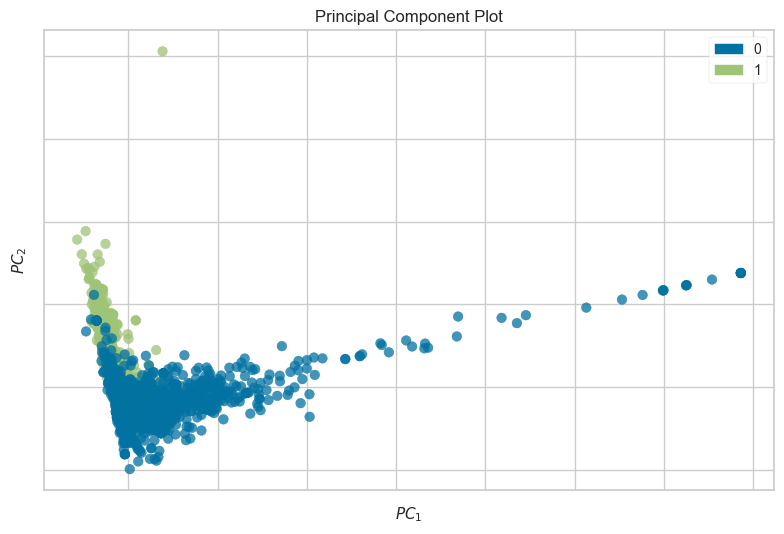

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [11]:
# Specify the features of interest and the target
X, y = load_spam()
classes = [0, 1]

visualizer = PCA(scale=True, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show()

5.6. Rozdzielacz
a) Dyskretny cel

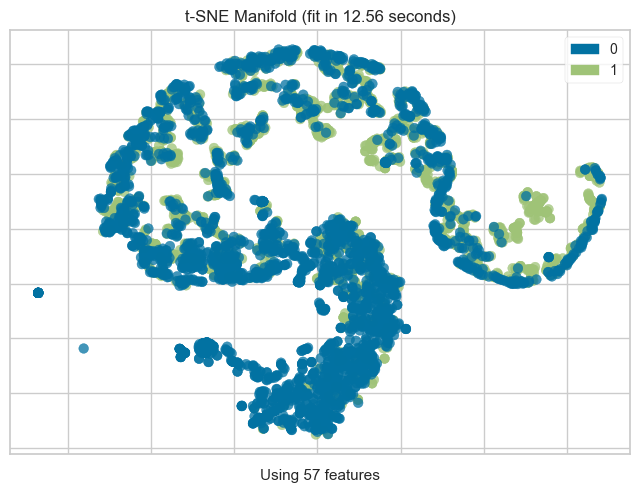

<Axes: title={'center': 't-SNE Manifold (fit in 12.56 seconds)'}, xlabel='Using 57 features'>

In [12]:
X, y = load_spam()
classes = [0, 1]

viz = Manifold(manifold="tsne", classes=classes)

viz.fit_transform(X, y)
viz.show()

b) Ciągły cel

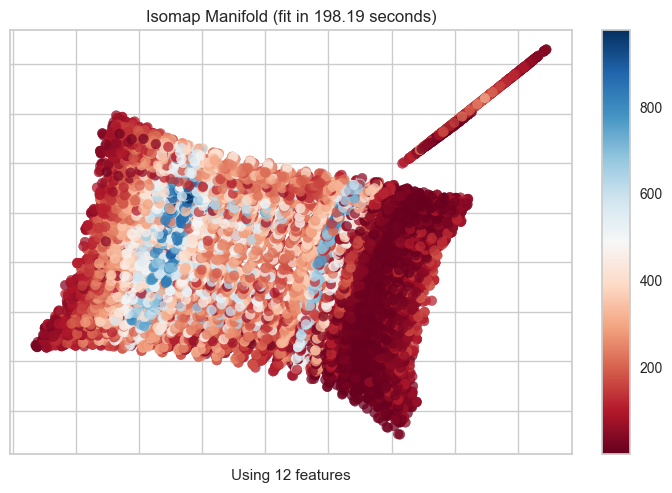

<Axes: title={'center': 'Isomap Manifold (fit in 198.19 seconds)'}, xlabel='Using 12 features'>

In [13]:
X, y = load_bikeshare()

viz = Manifold(manifold="isomap", n_neighbors=10)

viz.fit_transform(X, y)
viz.show()

5.7. Wspólna działka

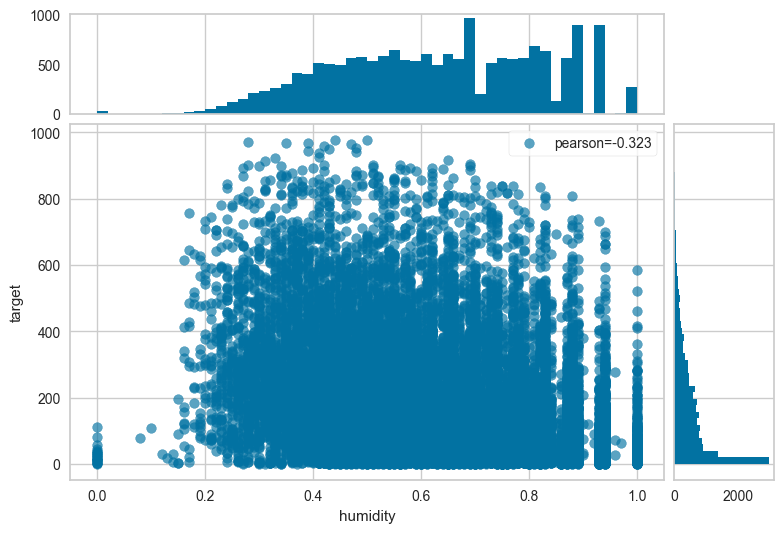

<Axes: xlabel='humidity', ylabel='target'>

In [14]:
X, y = load_bikeshare()

visualizer = JointPlotVisualizer(columns="humidity")

visualizer.fit_transform(X, y)
visualizer.show() 